In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from OptimumFilter import *

# Load templates, traces, and precomputed PSD
ka_template = np.load('../templates/Ka_template.npy')
ka_data_1 = np.load('../traces/Ka_traces_1.npz')['data']
ka_data_2 = np.load('../traces/Ka_traces_2.npz')['data']

noise_psd = np.load('../templates/noise_psd_from_MMC.npy')  # Load precomputed PSD


sampling_frequency = 3_906_250

silent_traces = np.zeros((2182, 32768), dtype=np.float32)  # or np.int16, depending on your data format


# Initialize and use OptimumFilter with Ka template
opt_filter_ka = OptimumFilter(template=ka_template, noise_psd=noise_psd, sampling_frequency=sampling_frequency)

amplitude_ka_1, chi_square_ka_1 = opt_filter_ka.fit(ka_data_1)

amplitude_ka_2, chi_square_ka_2 = opt_filter_ka.fit(ka_data_2)

silent_ampl, silent_chi2 = opt_filter_ka.fit(silent_traces)

In [15]:
E_2 = 3.26315e-06
E_1 = 0.532509
E_0 = 0.0

def compute_energy(cOF_ampl_array):
    """
    Convert corrected OF amplitudes to energy using a second-order calibration polynomial.

    Parameters:
    - cOF_ampl_array: numpy.ndarray of corrected OF amplitudes

    Returns:
    - energy_array: numpy.ndarray of energies in eV
    """
    return E_2 * cOF_ampl_array**2 + E_1 * cOF_ampl_array + E_0


In [17]:
E_1s = compute_energy(amplitude_ka_1)
E_2s = compute_energy(amplitude_ka_2)
E_sil = compute_energy(silent_ampl)

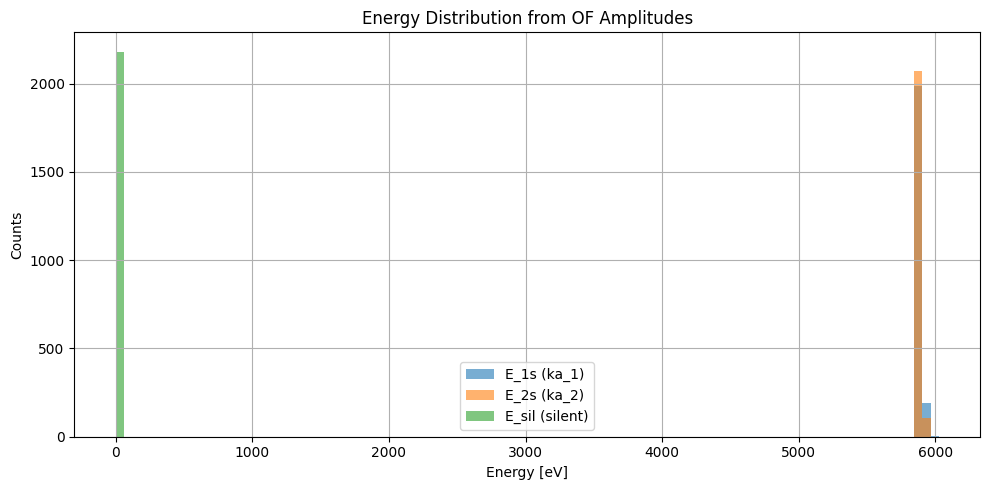

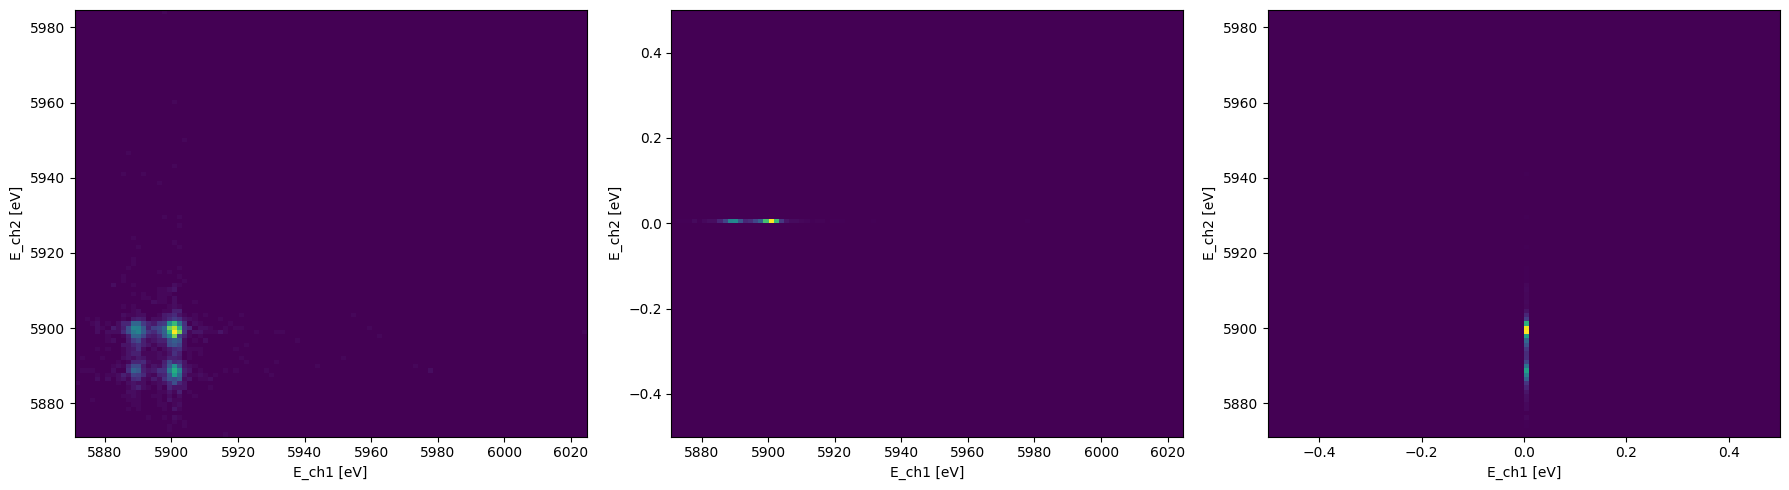

In [28]:
import matplotlib.pyplot as plt

# Define common binning
bins = 100  # or use: [np.linspace(...), np.linspace(...)] for custom bins

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# (1) E_1s vs E_2s
axs[0].hist2d(E_1s, E_2s, bins=bins, cmap='viridis')
axs[0].set_xlabel('E_ch1 [eV]')
axs[0].set_ylabel('E_ch2 [eV]')

# (2) E_1s vs E_sil
axs[1].hist2d(E_1s, E_sil, bins=bins, cmap='viridis')
axs[1].set_xlabel('E_ch1 [eV]')
axs[1].set_ylabel('E_ch2 [eV]')

# (3) E_sil vs E_2s
axs[2].hist2d(E_sil, E_2s, bins=bins, cmap='viridis')
axs[2].set_xlabel('E_ch1 [eV]')
axs[2].set_ylabel('E_ch2 [eV]')

plt.tight_layout()
plt.show()
